# 地图数据预处理 

In [1]:
from pyrosm import OSM
from pyrosm import get_data
import osmnx as ox
import geopandas as gpd
import pandas as pd

# change the global options that Geopandas inherits from
pd.set_option('display.max_columns',None)

import os
os.environ['USE_PYGEOS'] = '0'

/home/liuhaozhe/anaconda3/envs/path_finding/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
os.chdir("/home/liuhaozhe/AI_CS/pathfinding/notebook")

In [3]:
# Initialize the OSM parser object
osm = OSM("data/Wuhan.osm.pbf")

## 读取武汉市区域划分信息

In [4]:
# Read boundaries
bounds = osm.get_boundaries()
# bounds = bounds.drop(columns=['admin_level', 'name', 'boundary', 'id', 'timestamp', 'version', 'changeset',
#        'tags', 'osm_type'])
bounds

,admin_level,boundary,id,timestamp,version,osm_type,geometry,name,changeset,tags
0,6,administrative,343490108,0,-1,way,"MULTILINESTRING ((114.37698 30.51389, 114.3769...",NaN,NaN,NaN
1,6,administrative,343490118,0,-1,way,"POLYGON ((114.38517 30.51241, 114.38517 30.512...",NaN,NaN,NaN
2,6,administrative,343490121,0,-1,way,"MULTILINESTRING ((114.39074 30.50963, 114.3904...",NaN,NaN,NaN
3,6,administrative,50829711,0,-1,relation,"POLYGON ((114.21312 30.62777, 114.21668 30.627...",东西湖区,0.0,"{""alt_name"":""\u4E1C\u897F\u6E56;Dongxihu"",""nam..."
4,6,administrative,53906006,0,-1,relation,"POLYGON ((114.20814 30.58253, 114.21132 30.580...",汉阳区,0.0,"{""name:ceb"":""Hanyang District"",""name:de"":""Hany..."
...,...,...,...,...,...,...,...,...,...,...
94,8,administrative,419776301,0,-1,relation,"POLYGON ((114.21974 30.54409, 114.22294 30.543...",江堤街道,0.0,"{""type"":""boundary"",""wikidata"":""Q11134105""}"
95,10,administrative,445314546,0,-1,relation,"POLYGON ((114.31551 30.53505, 114.31666 30.536...",紫阳东路社区,0.0,"{""type"":""boundary""}"
96,10,administrative,448565469,0,-1,relation,"POLYGON ((114.31982 30.53635, 114.31992 30.536...",武珞路社区,0.0,"{""type"":""boundary""}"
97,10,administrative,451816393,0,-1,relation,"POLYGON ((114.31448 30.54217, 114.31453 30.541...",长春社区,0.0,"{""type"":""boundary""}"


## 读取武汉市道路信息

In [5]:
# Read all drivable roads
nodes, edges = osm.get_network("driving", nodes=True)


In [6]:
nodes.head(5)

,lon,lat,tags,timestamp,version,changeset,id,geometry
0,114.387020,30.516003,None,0,0,0,1205476699,POINT (114.38702 30.51600)
1,114.386894,30.516051,None,0,0,0,1282461063,POINT (114.38689 30.51605)
2,114.385770,30.516996,None,0,0,0,1282461079,POINT (114.38577 30.51700)
3,114.385522,30.517274,None,0,0,0,2864431773,POINT (114.38552 30.51727)
4,114.385544,30.517336,None,0,0,0,1197804623,POINT (114.38554 30.51734)


In [7]:
edges.tail(5)

,access,bicycle,bridge,cycleway,foot,highway,junction,lanes,lit,maxspeed,motorcar,motorroad,motor_vehicle,name,oneway,ref,service,segregated,sidewalk,smoothness,surface,tracktype,tunnel,width,id,timestamp,version,tags,osm_type,geometry,u,v,length
55087,None,yes,None,None,yes,living_street,None,None,None,None,None,None,no,後宰門,None,None,None,None,None,None,None,None,None,4,1135986377,0,-1,"{""horse"":""no"",""note"":""\u6545\u695A\u738B\u5E9C...",way,"LINESTRING (114.29507 30.54577, 114.29637 30.5...",10589533432,8659202007,124.451
55088,None,None,None,None,None,service,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1136234329,0,-1,None,way,"LINESTRING (114.29948 30.54512, 114.29960 30.5...",5982860248,5982860411,11.474
55089,None,None,None,None,None,service,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1136234329,0,-1,None,way,"LINESTRING (114.29960 30.54510, 114.30027 30.5...",5982860411,5980719402,64.512
55090,None,None,None,None,None,service,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1136234330,0,-1,None,way,"LINESTRING (114.30158 30.54492, 114.30171 30.5...",5982860271,5982860249,12.615
55091,None,None,None,None,None,service,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1136234330,0,-1,None,way,"LINESTRING (114.30171 30.54491, 114.30195 30.5...",5982860249,5982860250,26.801


In [8]:
len(edges.index)

55092

In [9]:
len(nodes.index)

49260

<AxesSubplot:>

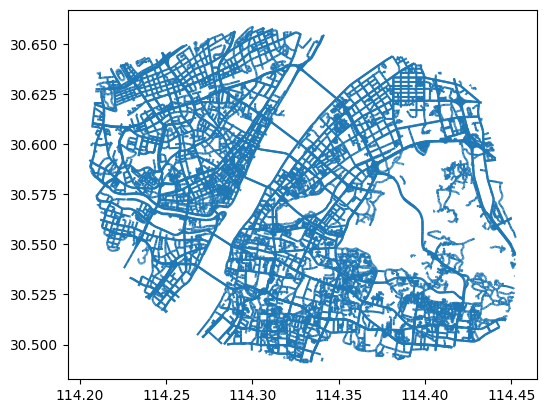

In [10]:
edges.plot()

## 新增起点终点位置的经纬度栏

In [11]:
edges["src_lo"] = edges["geometry"].apply(lambda x: str(x.coords[0][0]))
edges["src_la"] = edges["geometry"].apply(lambda x: str(x.coords[0][1]))
edges["dst_lo"] = edges["geometry"].apply(lambda x: str(x.coords[1][0]))
edges["dst_la"] = edges["geometry"].apply(lambda x: str(x.coords[1][1]))

In [12]:
edges.head(5)

,access,bicycle,bridge,cycleway,foot,highway,junction,lanes,lit,maxspeed,motorcar,motorroad,motor_vehicle,name,oneway,ref,service,segregated,sidewalk,smoothness,surface,tracktype,tunnel,width,id,timestamp,version,tags,osm_type,geometry,u,v,length,src_lo,src_la,dst_lo,dst_la
0,None,None,None,None,None,tertiary,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,26130796,0,-1,None,way,"LINESTRING (114.38702 30.51600, 114.38689 30.5...",1205476699,1282461063,13.220,114.3870198,30.5160031,114.3868937,30.5160514
1,None,None,None,None,None,tertiary,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,26130796,0,-1,None,way,"LINESTRING (114.38689 30.51605, 114.38577 30.5...",1282461063,1282461079,150.441,114.3868937,30.5160514,114.3857698,30.5169964
2,None,None,None,None,None,tertiary,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,26130796,0,-1,None,way,"LINESTRING (114.38577 30.51700, 114.38552 30.5...",1282461079,2864431773,38.969,114.3857698,30.5169964,114.3855221,30.5172744
3,None,None,None,None,None,tertiary,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,26130796,0,-1,None,way,"LINESTRING (114.38552 30.51727, 114.38554 30.5...",2864431773,1197804623,7.125,114.3855221,30.5172744,114.3855445,30.5173355
4,None,None,None,None,None,secondary,None,2,None,None,None,None,None,喻家湖路,yes,None,None,None,None,None,None,None,None,None,26131891,0,-1,None,way,"LINESTRING (114.41842 30.50881, 114.41844 30.5...",905069790,4524691355,14.913,114.4184212,30.5088091,114.4184383,30.5089424


## 对oneway栏中的信息进行处理

oneway栏中的Null改为no， 并把yes和no映射为1和0.

In [13]:
edges["oneway"] = edges["oneway"].apply(lambda x: 0 if not x or x is "no" else 1)

## 删除多余信息栏

In [14]:
edges.columns

Index(['access', 'bicycle', 'bridge', 'cycleway', 'foot', 'highway',
       'junction', 'lanes', 'lit', 'maxspeed', 'motorcar', 'motorroad',
       'motor_vehicle', 'name', 'oneway', 'ref', 'service', 'segregated',
       'sidewalk', 'smoothness', 'surface', 'tracktype', 'tunnel', 'width',
       'id', 'timestamp', 'version', 'tags', 'osm_type', 'geometry', 'u', 'v',
       'length', 'src_lo', 'src_la', 'dst_lo', 'dst_la'],
      dtype='object')

In [15]:
edges = edges.drop(columns=['access', 'bicycle', 'bridge', 'cycleway', 'foot', 'highway',
       'junction', 'lanes', 'lit', 'maxspeed', 'motorcar', 'motorroad',
       'motor_vehicle', 'name', 'ref', 'service', 'segregated',
       'sidewalk', 'smoothness', 'surface', 'tracktype', 'tunnel', 'width',
       'id', 'timestamp', 'version', 'tags', 'osm_type'])

In [16]:
edges.head(5)

,oneway,geometry,u,v,length,src_lo,src_la,dst_lo,dst_la
0,0,"LINESTRING (114.38702 30.51600, 114.38689 30.5...",1205476699,1282461063,13.220,114.3870198,30.5160031,114.3868937,30.5160514
1,0,"LINESTRING (114.38689 30.51605, 114.38577 30.5...",1282461063,1282461079,150.441,114.3868937,30.5160514,114.3857698,30.5169964
2,0,"LINESTRING (114.38577 30.51700, 114.38552 30.5...",1282461079,2864431773,38.969,114.3857698,30.5169964,114.3855221,30.5172744
3,0,"LINESTRING (114.38552 30.51727, 114.38554 30.5...",2864431773,1197804623,7.125,114.3855221,30.5172744,114.3855445,30.5173355
4,1,"LINESTRING (114.41842 30.50881, 114.41844 30.5...",905069790,4524691355,14.913,114.4184212,30.5088091,114.4184383,30.5089424


In [17]:
nodes.columns

Index(['lon', 'lat', 'tags', 'timestamp', 'version', 'changeset', 'id',
       'geometry'],
      dtype='object')

In [18]:
nodes= nodes.drop(columns=['tags', 'timestamp', 'version', 'changeset', 'id'])

In [19]:
nodes.head(5)

,lon,lat,geometry
0,114.387020,30.516003,POINT (114.38702 30.51600)
1,114.386894,30.516051,POINT (114.38689 30.51605)
2,114.385770,30.516996,POINT (114.38577 30.51700)
3,114.385522,30.517274,POINT (114.38552 30.51727)
4,114.385544,30.517336,POINT (114.38554 30.51734)


## 数据存储为GeoJSON格式

In [20]:
bounds.to_file("data/bounds.geojson", driver="GeoJSON")

In [21]:
edges.to_file("data/edges.geojson", driver="GeoJSON")  

In [ ]:
nodes.to_file("data/nodes.geojson", driver="GeoJSON")  